# Overview of seaborn plotting functions
Most of your interactions with seaborn will happen through a set of plotting functions. Later chapters in the tutorial will explore the specific features offered by each function. This chapter will introduce, at a high-level, the different kinds of functions that you will encounter.

## Similar functions for similar tasks
The seaborn namespace is flat; all of the functionality is accessible at the top level. But the code itself is hierarchically structured, with modules of functions that achieve similar visualization goals through different means. Most of the docs are structured around these modules: you’ll encounter names like “relational”, “distributional”, and “categorical”.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

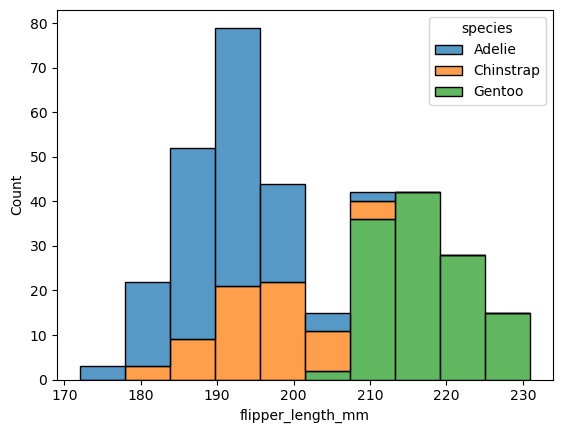

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

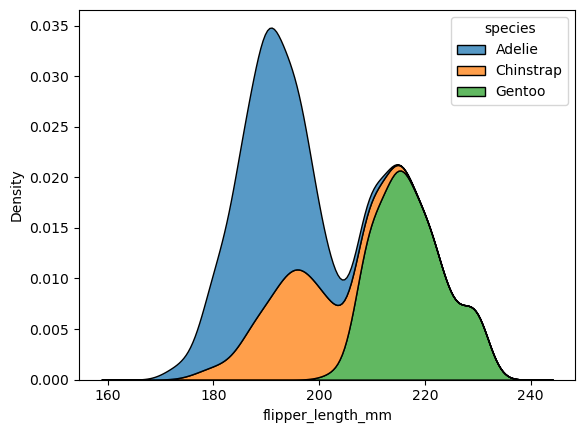

In [2]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

## Figure-level vs. axes-level functions
In addition to the different modules, there is a cross-cutting classification of seaborn functions as “axes-level” or “figure-level”. The examples above are axes-level functions. They plot data onto a single matplotlib.pyplot.Axes object, which is the return value of the function.

In contrast, figure-level functions interface with matplotlib through a seaborn object, usually a FacetGrid, that manages the figure. Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions.

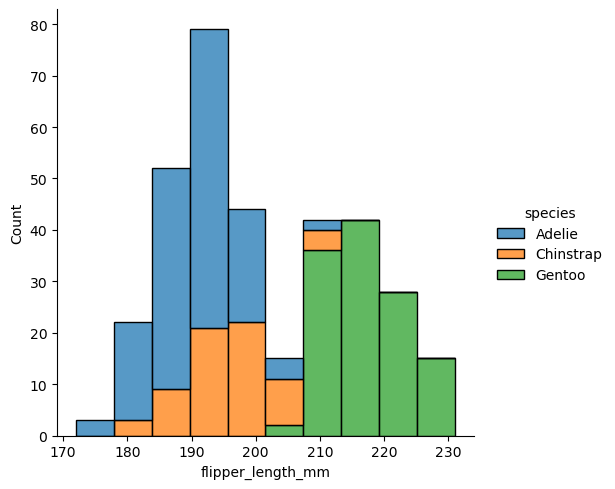

In [3]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

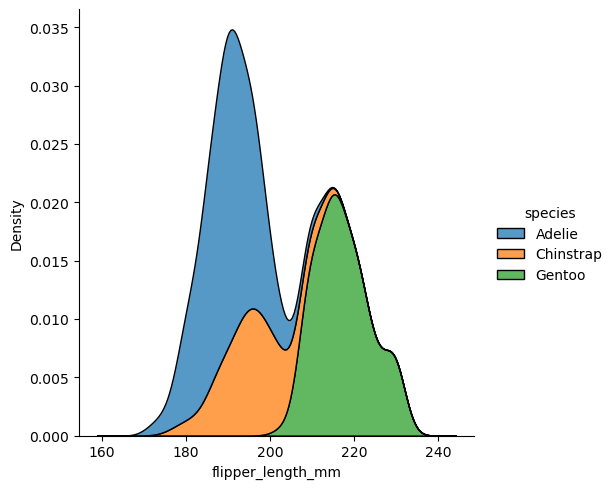

In [4]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde")

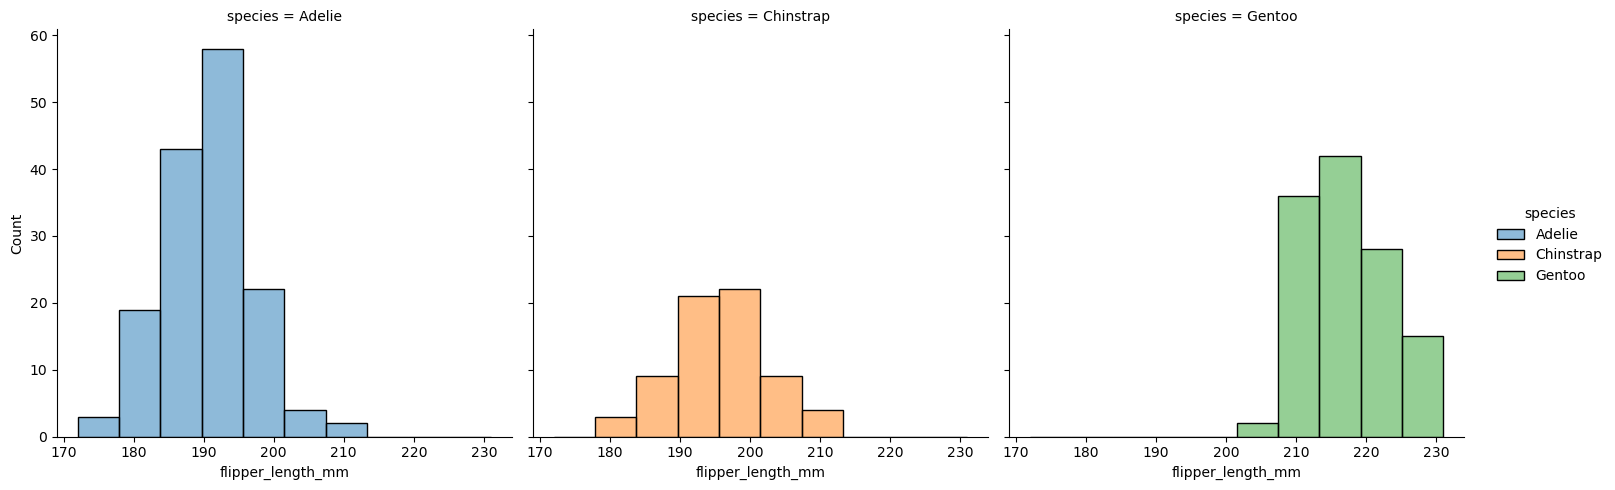

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species")

## Axes-level functions make self-contained plots
The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go

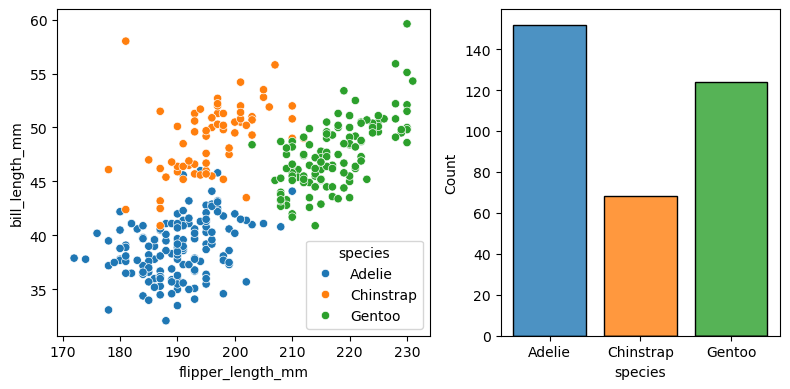

In [6]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## Figure-level functions own their figure
In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way

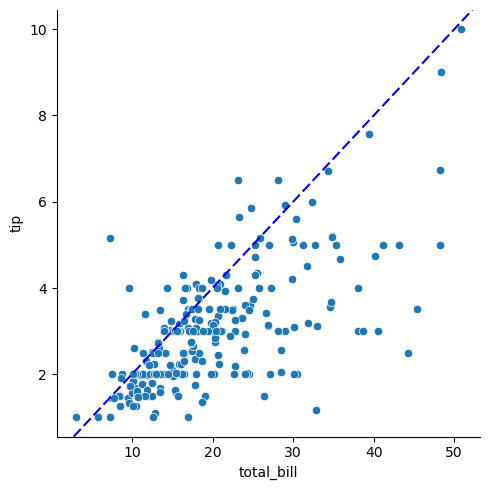

In [7]:
tips = sns.load_dataset("tips")
g = sns.relplot(data=tips, x="total_bill", y="tip")
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

## Customizing plots from a figure-level function
The figure-level functions return a FacetGrid instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code

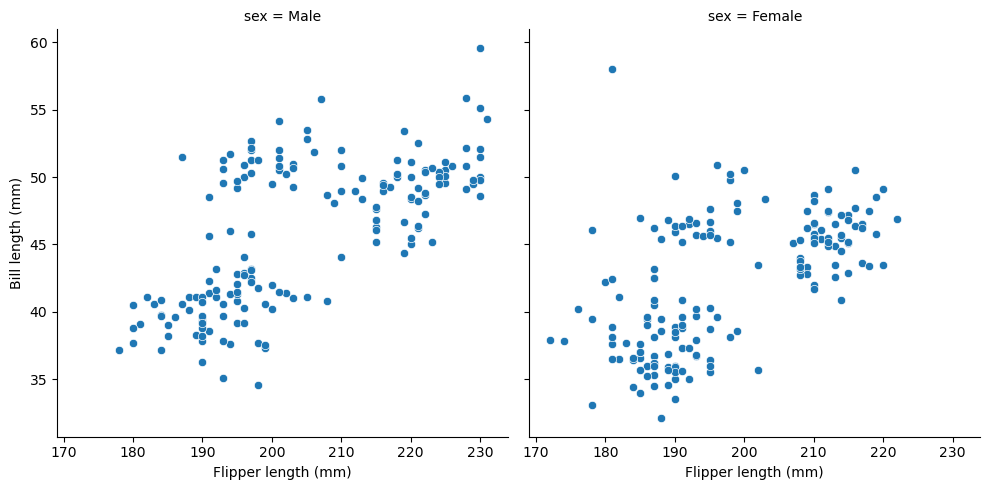

In [8]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

## Combining multiple views on the data
Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, jointplot() and pairplot(), employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are figure-level functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.

jointplot() plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately

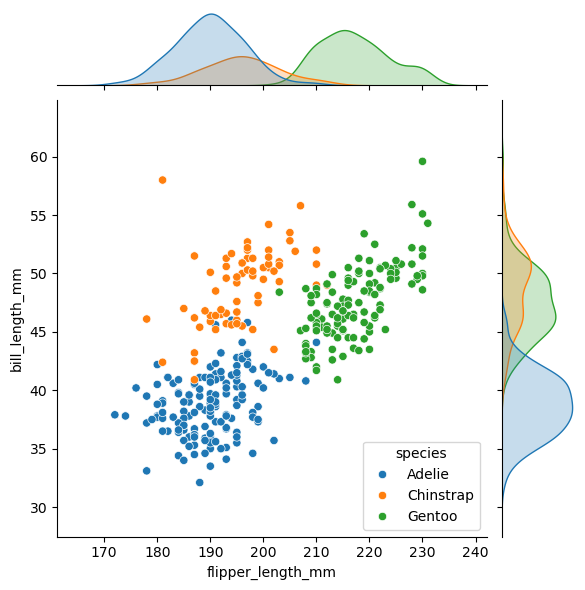

In [9]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

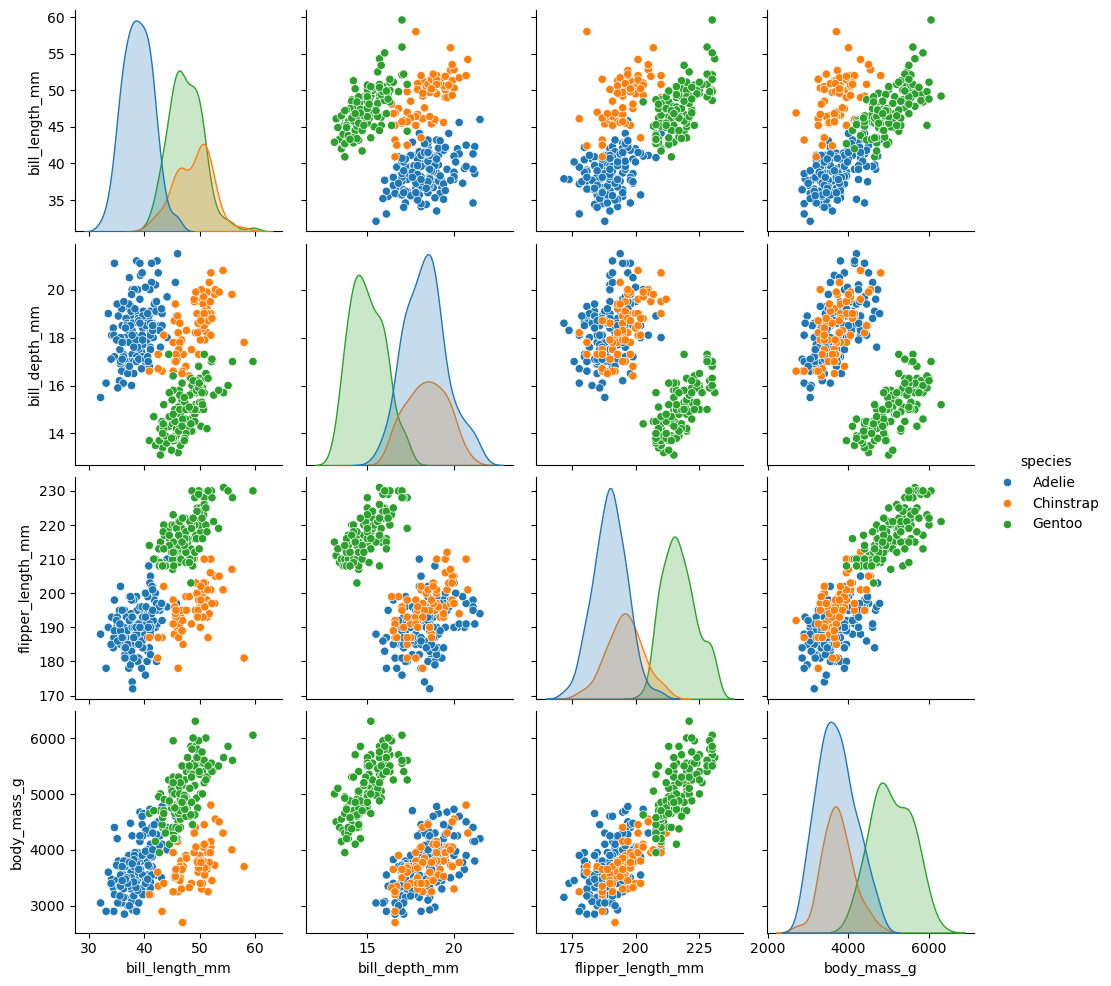

In [10]:
sns.pairplot(data=penguins, hue="species")

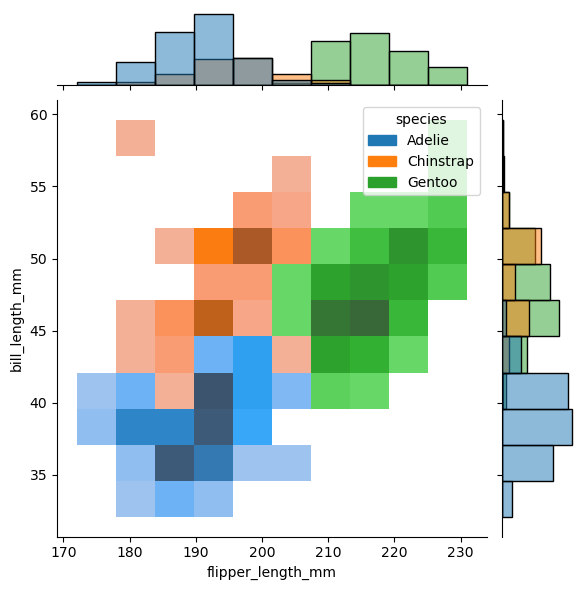

In [11]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", kind="hist")